The notes are based on Jason Bramburger's online lecture on the Lorenz equations, as part of his dynamical systems lecture series. 

The system is given by the following equations:

$$\dot{\bf x } = \sigma (y-x)\\ \dot{\bf y } = x(\rho-z)-y \\ \dot{\bf z } = xy - \beta z$$

Checklist for studying the Lorenz '63 system:

### Theory
- **Symmetry**: The transformation $(x, y, z) \to (-x, -y, z)$ leaves the equations invariant. 
    - This means that solutions to the system are symmetric about the $z$-axis. 
- **Volume Contraction (Dissipativity)**: 
    - Compute the divergence of the vector field: $\nabla \cdot \mathbf{f} = \frac{\partial \dot{x}}{\partial x} + \frac{\partial \dot{y}}{\partial y} + \frac{\partial \dot{z}}{\partial z}$.
        - $-\sigma - \beta - 1$
    - Show that the volume shrinks exponentially: $V(t) = V(0)e^{-(\sigma + 1 + \beta)t}$.
        - First, compute the volume using Louisville theorem: $$ \frac{dV(t)}{dt} = \int_{V(t)} (\nabla \cdot f) ~dV$$
        - We already computed the divergence: $$\dot{V(t)} = \frac{dV(t)}{dt} =-(\sigma + \beta + 1) \int_{V(t)} ~dV = -(\sigma + \beta + 1) V(t)$$
        - This is a linear ODE, with the solution given by exponential decay: $$V(t) = V(0)e^{-(\sigma + \beta + 1)t} $$
- **Fixed Points**:
    - Solve the system $\dot{x} = \dot{y} = \dot{z} = 0$ to find the origin $O$ and the non-trivial fixed points $C^+$ and $C^-$.
        - one of the fixed points is the origin: $(0,0,0)$ 
        - The other fixed points $C^+$ and $C^-$ are $(\pm \sqrt{\beta(\rho-1)},\pm \sqrt{\beta(\rho-1)}, \rho-1)$ 
    - Identify the condition on $\rho$ for which $C^+$ and $C^-$ exist.
        - we are working in real numbers so for $\rho <1$, $C^+$ and $C^-$ doesn't exist
- **Linear Stability**:
    - Compute the general Jacobian matrix $J(x, y, z)$.
        - $$J = \begin{bmatrix} -\sigma & \sigma & 0 \\ \rho - z & -1 & -x \\ y & x & -\beta \end{bmatrix}$$
    - **Stability of the Origin $O$**: Find the eigenvalues of $J(0, 0, 0)$. For what value of $\rho$ does $O$ lose stability?
        - $$\begin{bmatrix} -\sigma & \sigma & 0\\ \rho & -1 & 0 \\ 0 & 0 & -\beta \end{bmatrix}$$
        - We can linearize the system close to the origin. $$\dot{x} = Jx $$ 
        - We can diagonalize $J$ and decouple the system. $J = PDP^{-1}$ where $D$ is a diagonal matrix of eigenvalues and $P$ is the eigenmatrix. 
        - The columns of the eigenmatrix forms a basis. 
        - We can do a coordinate transform of our state vector into the linearly independent basis vectors of the Jacobian. 
        - Then we end up with a system of linear ODEs: $$\dot{x_1} = \lambda_1 x_1, \dot{x_2} = \lambda_2 x_2,\dot{x_3}= \lambda_3 x_3$$
        - As a result, we end up getting: $$x_i(t) = x_i(0) e^{\lambda_i t} $$
        - If $\text{Re}(\lambda_i) >0$ for any eigenvalue, system becomes unstable if the initial value of the component is non-zero.
        - If less than zero, then it collapses to the origin.
    - **Stability of $C^\pm$**: will solve numerically.
- **Bifurcation Analysis**:
    - **Pitchfork Bifurcation**: Confirm it occurs at $\rho = 1$. Is it subcritical or supercritical?
    - **Hopf Bifurcation**: For $\sigma > \beta + 1$, find the value $\rho_H$ where $C^\pm$ lose stability via a Hopf bifurcation.

### Computational & Simulation Tasks
- [ ] **Global Stability ($\rho < 1$)**: Run the simulation with $\rho = 0.5$ and various initial conditions. Does every trajectory converge to the origin?
- [ ] **Steady State ($\rho = 15$)**: Run the simulation for $1 < \rho < \rho_H$. Do trajectories settle into $C^+$ or $C^-$?
- [ ] **Sensitive Dependence on Initial Conditions**:
    - Pick an initial condition $u_0$ and a slightly perturbed $u'_0 = u_0 + \epsilon$.
    - Plot $|u(t) - u'(t)|$ over time on a log scale. Observe the "horizon of predictability."
- [ ] **Strange Attractor**:
    - Visualize the 3D trajectory at $\rho = 28$. 
    - Explore the structure: Does the trajectory ever intersect itself?
- [ ] **Lorenz Map**:
    - Record the successive local maxima of $z(t)$, denoted as $z_n$.
    - Plot $z_{n+1}$ vs $z_n$. What does the shape of this map tell you about the chaos in the system?

In [3]:
# check for changes in the .py files loaded
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from lorenz63JAX import LorenzSimulatorK4, rollout

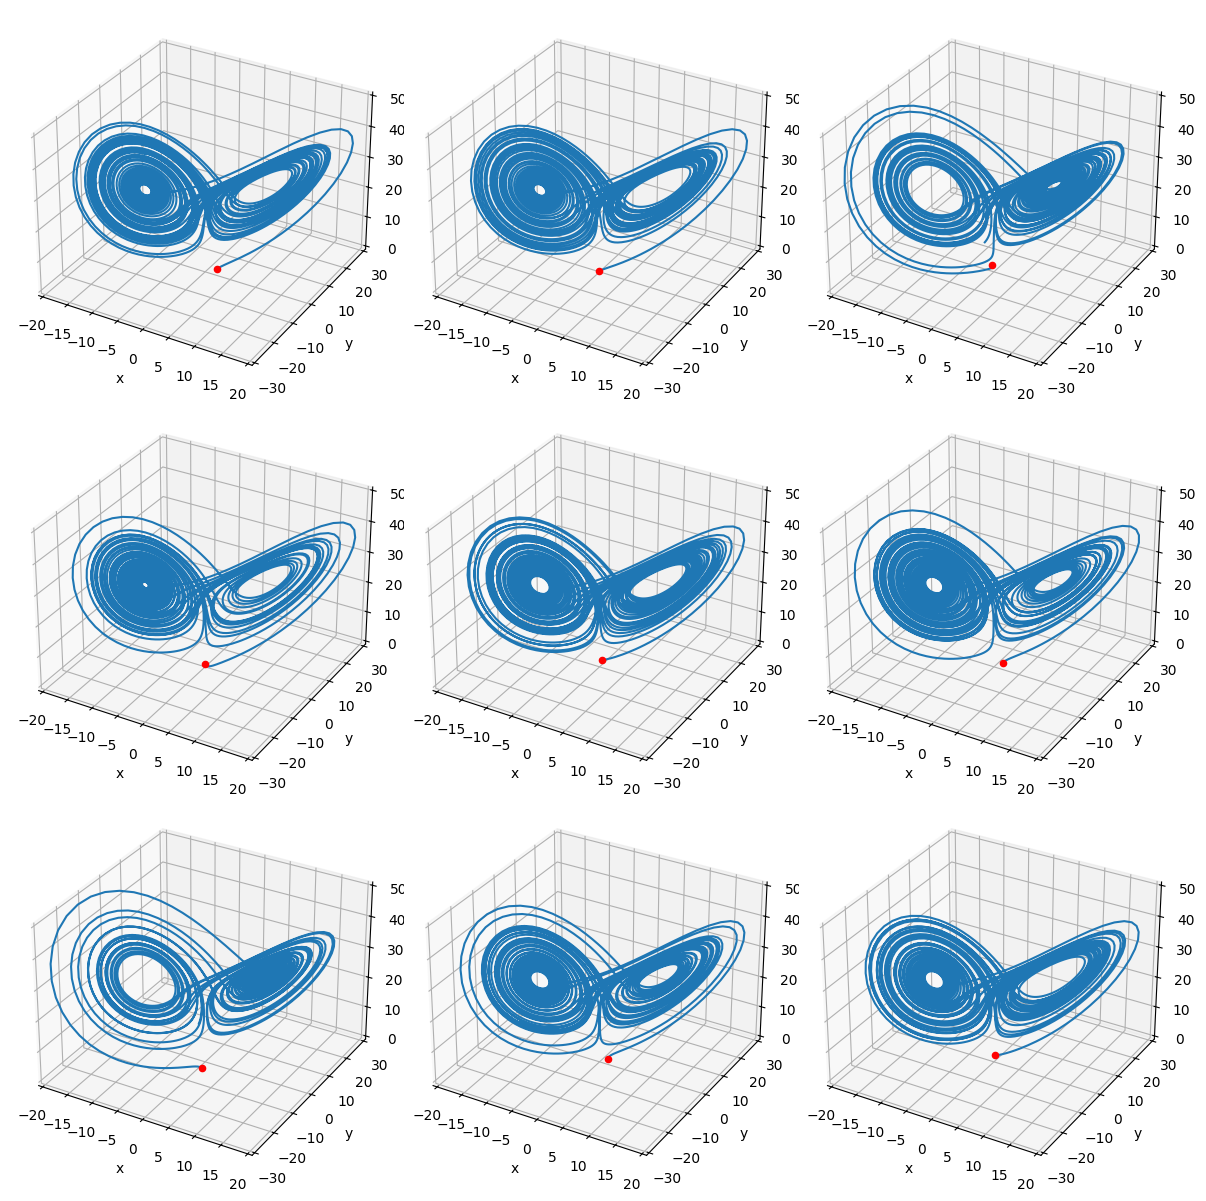

In [5]:
# using default parameter values: sigma=10, rho=28, beta=8/3
# generate trajectories for different initial conditions

u_0_set = jax.random.normal(jax.random.PRNGKey(0), (9, 3))
lorenzStepper = LorenzSimulatorK4()
iterations = 5000

rollout_func = rollout(lorenzStepper, iterations, include_init=True)
trajectory_set = jax.vmap(rollout_func)(u_0_set)

fig, axs = plt.subplots(3, 3, subplot_kw = {"projection": "3d"}, figsize = (12,12))
    
for i, ax in enumerate(axs.flat):
    # Plot the i-th trajectory
    ax.plot(
        trajectory_set[i,:,0],
        trajectory_set[i,:,1],
        trajectory_set[i,:,2],
    )

    ax.scatter3D(
        trajectory_set[i,0, 0],
        trajectory_set[i,0, 1],
        trajectory_set[i,0, 2],
        color = "red",
        label = "Starting point"
    )
    ax.set_xlim(-20,20)
    ax.set_ylim(-30,30)
    ax.set_zlim(0,50)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

plt.tight_layout()
plt.show()

In [ ]:
# track the difference between 

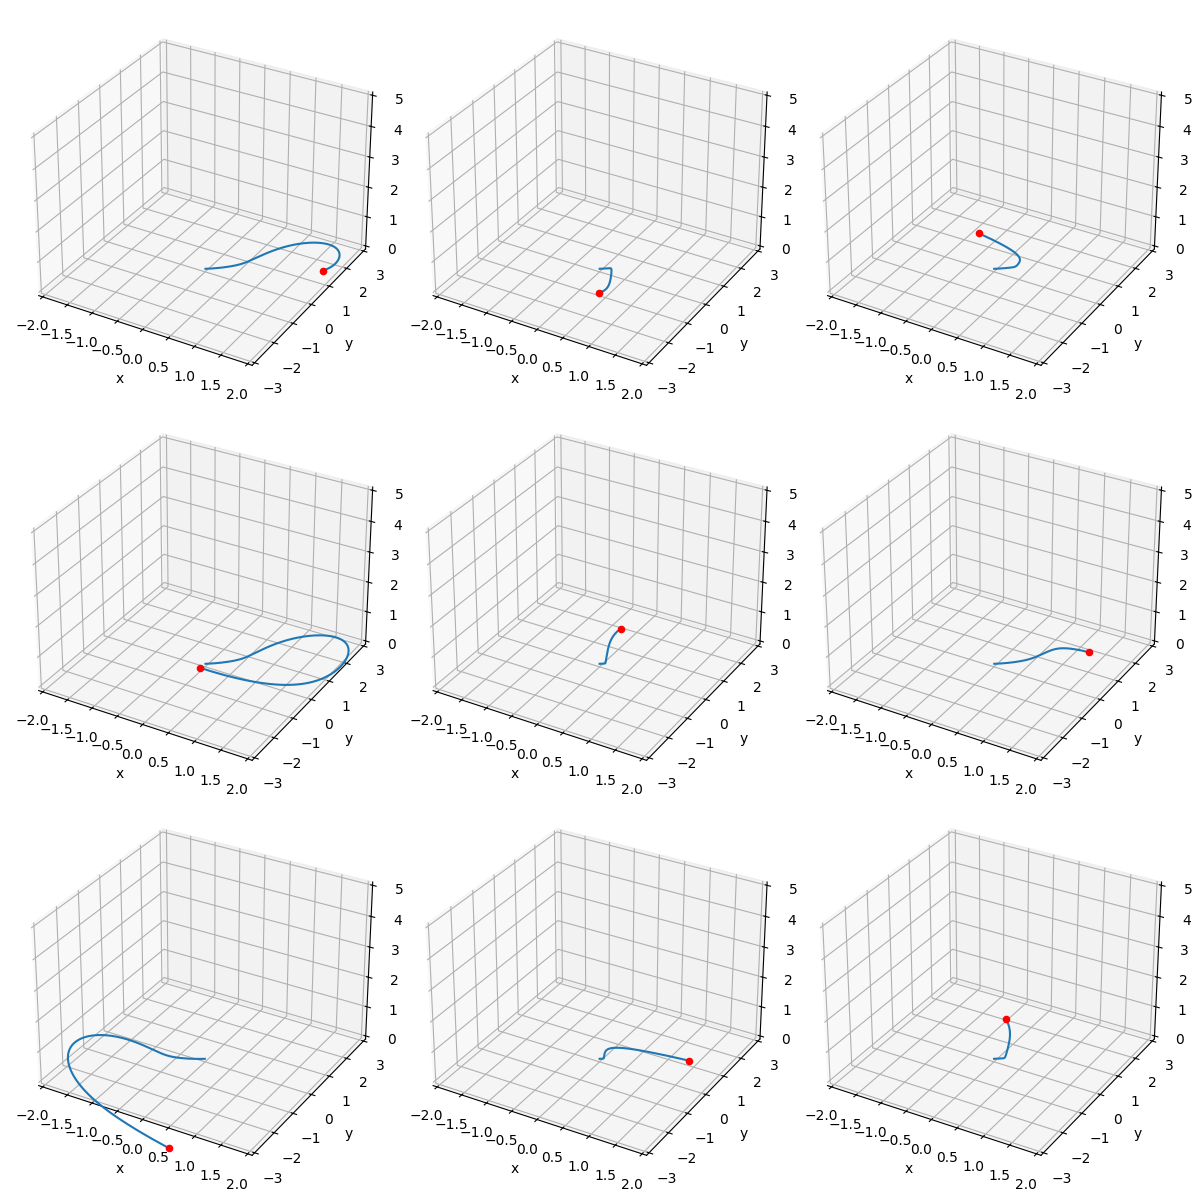

In [4]:
# using parameter values: rho=0.5

u_0_set = jax.random.normal(jax.random.PRNGKey(0), (9, 3))
lorenzStepper = LorenzSimulatorK4(rho = 0.9)
iterations = 5000

rollout_func = rollout(lorenzStepper, iterations, include_init=True)
trajectory_set = jax.vmap(rollout_func)(u_0_set)

fig, axs = plt.subplots(3, 3, subplot_kw = {"projection": "3d"}, figsize = (12,12))
    
for i, ax in enumerate(axs.flat):
    # Plot the i-th trajectory
    ax.plot(
        trajectory_set[i,:,0],
        trajectory_set[i,:,1],
        trajectory_set[i,:,2],
    )
    
    ax.scatter3D(
        trajectory_set[i,0, 0],
        trajectory_set[i,0, 1],
        trajectory_set[i,0, 2],
        color = "red",
        label = "Starting point"
    )

    ax.set_xlim(-2,2)
    ax.set_ylim(-3,3)
    ax.set_zlim(0,5)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

plt.tight_layout()
plt.show()

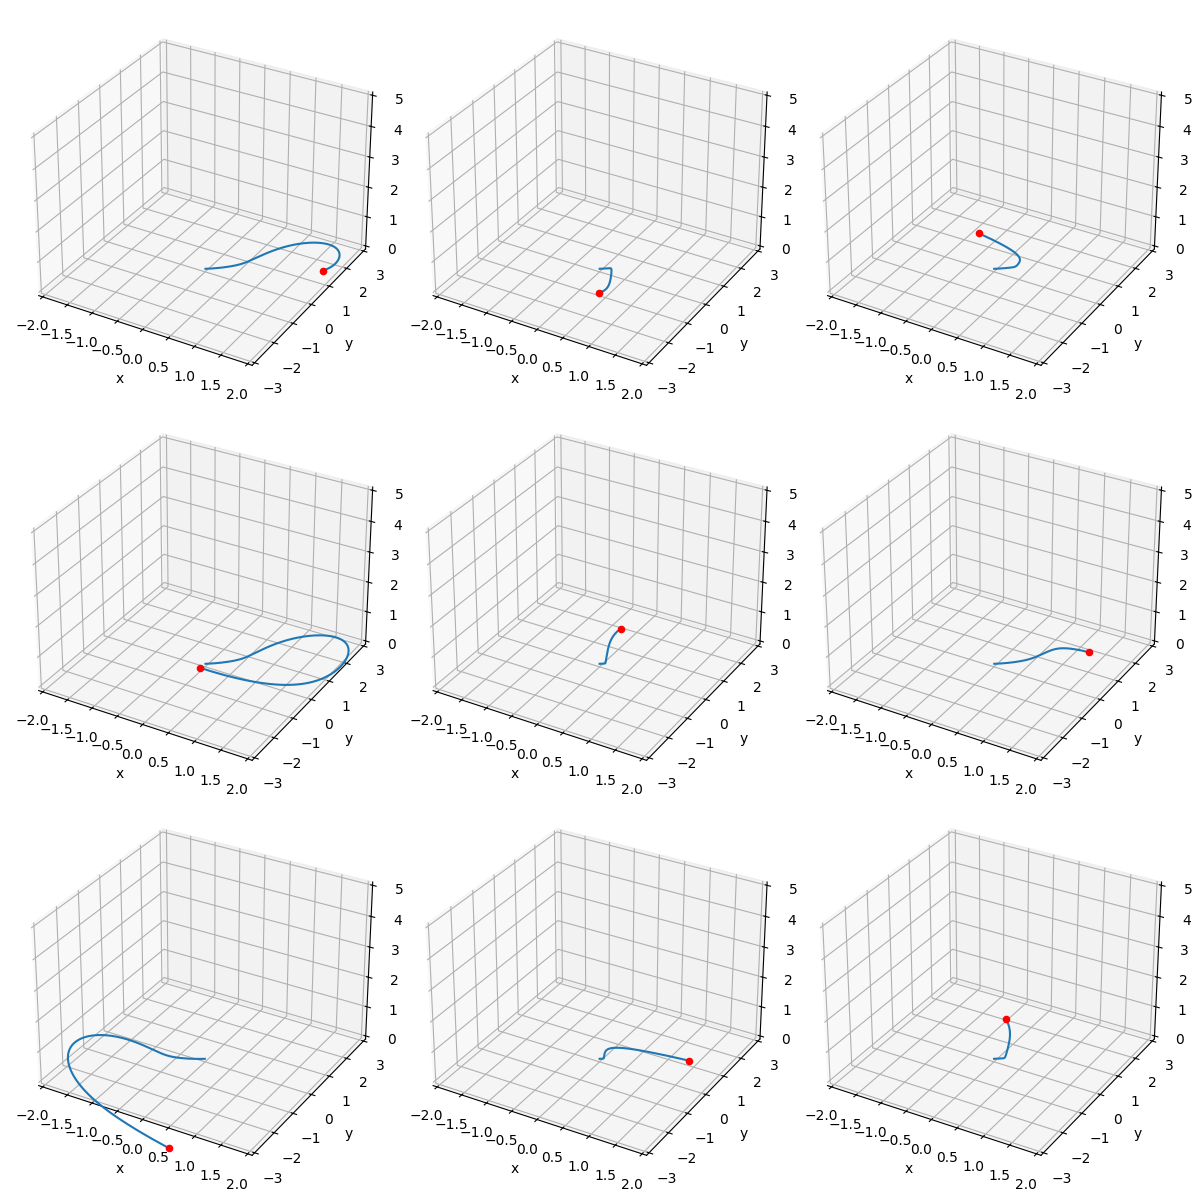

In [5]:
# using parameter values: rho= 0.9

u_0_set = jax.random.normal(jax.random.PRNGKey(0), (9, 3))
lorenzStepper = LorenzSimulatorK4(rho = 0.9)
iterations = 5000

rollout_func = rollout(lorenzStepper, iterations, include_init=True)
trajectory_set = jax.vmap(rollout_func)(u_0_set)

fig, axs = plt.subplots(3, 3, subplot_kw = {"projection": "3d"}, figsize = (12,12))
    
for i, ax in enumerate(axs.flat):
    # Plot the i-th trajectory
    ax.plot(
        trajectory_set[i,:,0],
        trajectory_set[i,:,1],
        trajectory_set[i,:,2],
    )
    
    ax.scatter3D(
        trajectory_set[i,0, 0],
        trajectory_set[i,0, 1],
        trajectory_set[i,0, 2],
        color = "red",
        label = "Starting point"
    )

    ax.set_xlim(-2,2)
    ax.set_ylim(-3,3)
    ax.set_zlim(0,5)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

plt.tight_layout()
plt.show()

# Pitchfork Bifurcation


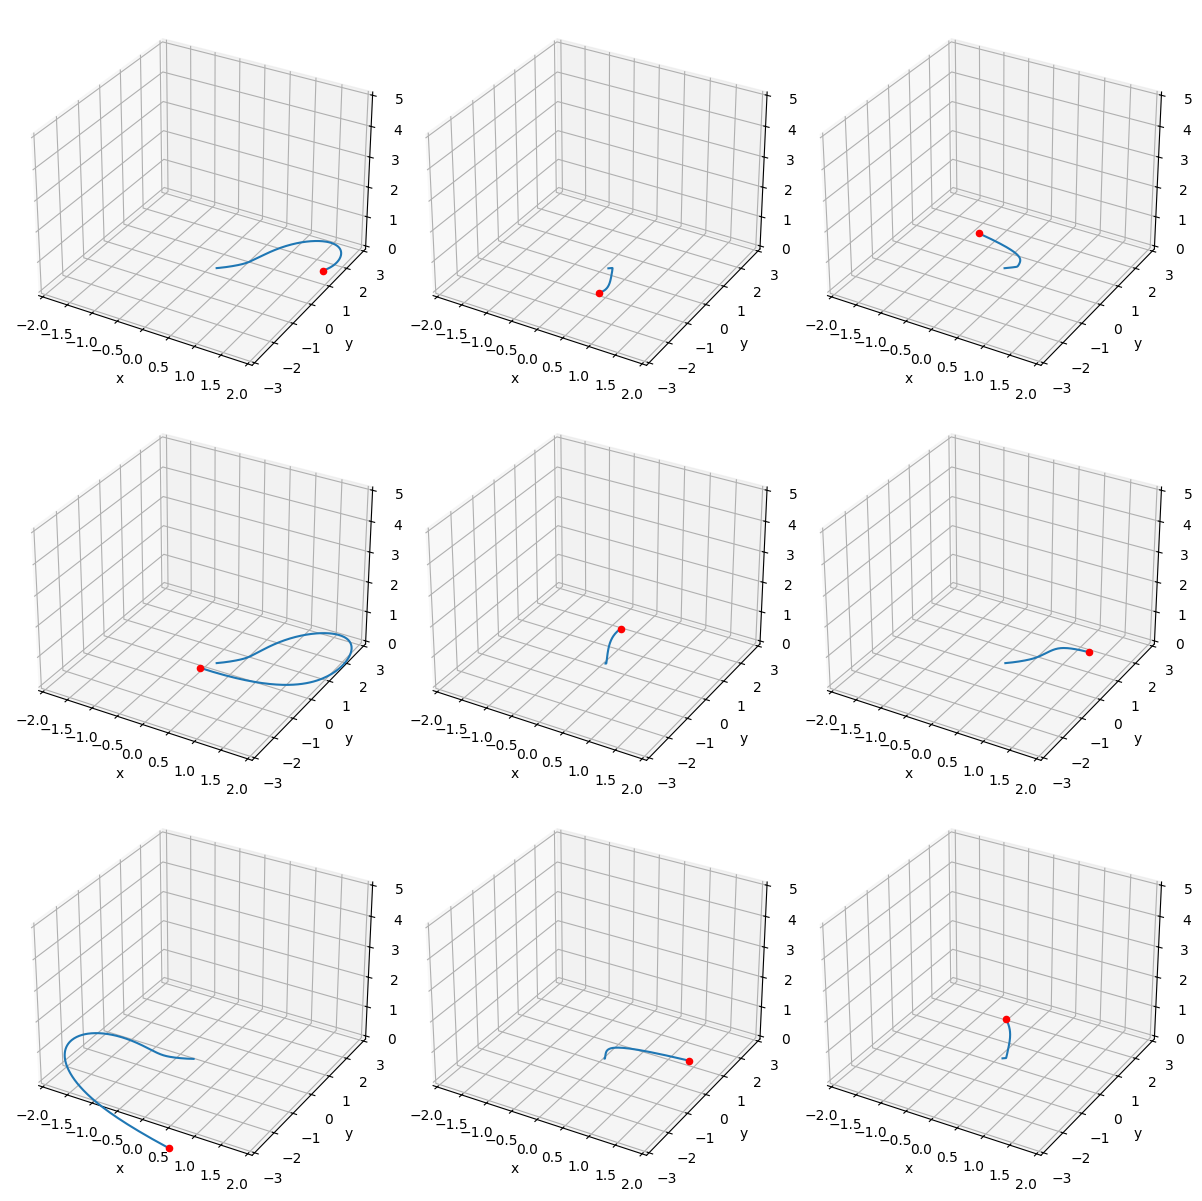

In [8]:
# using parameter values: rho= 1

u_0_set = jax.random.normal(jax.random.PRNGKey(0), (9, 3))
lorenzStepper = LorenzSimulatorK4(rho = 1)
iterations = 5000

rollout_func = rollout(lorenzStepper, iterations, include_init=True)
trajectory_set = jax.vmap(rollout_func)(u_0_set)

fig, axs = plt.subplots(3, 3, subplot_kw = {"projection": "3d"}, figsize = (12,12))
    
for i, ax in enumerate(axs.flat):
    # Plot the i-th trajectory
    ax.plot(
        trajectory_set[i,:,0],
        trajectory_set[i,:,1],
        trajectory_set[i,:,2],
    )
    
    ax.scatter3D(
        trajectory_set[i,0, 0],
        trajectory_set[i,0, 1],
        trajectory_set[i,0, 2],
        color = "red",
        label = "Starting point"
    )

    ax.set_xlim(-2,2)
    ax.set_ylim(-3,3)
    ax.set_zlim(0,5)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

plt.tight_layout()
plt.show()

In [9]:
# fixed points
lorenzStepper.fixed_points()

Array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [-0., -0.,  0.]], dtype=float32)

I don't see any discernible change in the plots. Also, what is stability? 

# Hopf Bifurcation

We will now test for Hopf Bifurcation. This happens when a pair of complex eigenvalues of the Jacobian crosses the imaginary axis (Real part goes from negative to positive).

$$\rho_H = \frac{\sigma(\sigma + \beta + 3)}{\sigma - \beta -1}$$ when $\sigma > \beta +1$. 